<a href="https://colab.research.google.com/github/drscook/day1_materials/blob/main/day1_materials_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 1 materials
I've uploaded all data and code (wrangling & analysis) to https://github.com/drscook/day1_materials.

- run setup code once
- data: either "students" or "courses" depending on if you want student-level or course-level analysis
- vars: list of variables used for analysis
- height: height of image - must be adjusted for different size analyses

In [18]:
import warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt, plotly.express as px
from IPython.core.display import HTML
warnings.simplefilter(action='ignore', category=FutureWarning)
students = pd.read_csv('https://raw.githubusercontent.com/drscook/day1_materials/main/data/students.csv')
courses = pd.read_csv('https://raw.githubusercontent.com/drscook/day1_materials/main/data/courses.csv')

def disp(df, max_rows=None, max_cols=200, **kwargs):
    display(HTML(pd.DataFrame(df).to_html(max_rows=max_rows, max_cols=max_cols, **kwargs)))

def analyze(data, vars, height=500):
    X = data[vars].dropna()
    dt = X.dtypes.apply(pd.api.types.is_numeric_dtype)
    val = dt[dt].index.tolist()
    grp = dt[~dt].index.tolist()
    Y = X.sort_values(grp)
    c = Y.filter(like='spend_per_crse').columns
    Y[c] = Y[c].clip(0, 300)

    if len(val) == 0:
        Z = X.groupby(grp).value_counts().to_frame('ct')
        grp.pop()
        Z['pct'] = 100 * Z['ct'] // X.groupby(grp).size()
        px.sunburst(Y, path=vars, height=height).update_traces(sort=False).show()
        px.icicle(Y, path=vars, height=height).update_traces(sort=False).show()
    else:
        Z = X.groupby(grp)[val].describe()
        for v in val:
            px.box(Y, y=v, x=grp[0], title=v, height=height, orientation='v',
                category_orders={g: np.unique(X[g]) for g in grp},
                color=grp[1] if len(grp) > 1 else None).show()
    disp(Z.reset_index())

##Analysis

In [19]:
disp(students,2)

,id,date,duration,progress,class,campus,internet,first,today,spend,num_crse_reported_pay,num_crse_reported,num_crse_details_pay,num_crse_details,num_crse_pay,num_crse,spend_per_crse_pay,spend_per_crse,pct_crse_pay,campus_bryan,campus_dist,campus_ftw,campus_steph,campus_waco,electronics_desktop,electronics_laptop,electronics_smartphone,electronics_tablet,sources_campus_bookstore,sources_different_edition,sources_from_instructor,sources_online,sources_other,sources_sharing_/_borrowing,why_cost,why_course_changes,why_delayed_order,why_didn't_know_what_materials_are_required,why_didn't_think_i_would_need_them_on_the_first_day,why_other_(please_specify),why_waiting_for_scholarships/financial_aid
0,r_10dx0r0i5ni8x6w,2024-01-29 15:42:25,397,100,1_fr,steph,1_yes_internet,2_most_first,3_all_today,306.0,4,5,4.0,5.0,4,5,76.0,61.0,80.0,False,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,r_7zft40peogp0je0,2024-01-31 15:36:06,94,48,1_fr,steph,0_no_internet,1_some_first,2_most_today,402.0,4,7,NaN,NaN,4,7,100.0,57.0,57.0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,True,False,False,True,True,False,True


In [20]:
disp(courses,2)

,id,subj,numb,require,first_crse,today_crse,use,date,duration,progress,class,campus,internet,first,today,spend,num_crse_reported_pay,num_crse_reported,num_crse_details_pay,num_crse_details,num_crse_pay,num_crse,spend_per_crse_pay,spend_per_crse,pct_crse_pay,campus_bryan,campus_dist,campus_ftw,campus_steph,campus_waco,electronics_desktop,electronics_laptop,electronics_smartphone,electronics_tablet,sources_campus_bookstore,sources_different_edition,sources_from_instructor,sources_online,sources_other,sources_sharing_/_borrowing,why_cost,why_course_changes,why_delayed_order,why_didn't_know_what_materials_are_required,why_didn't_think_i_would_need_them_on_the_first_day,why_other_(please_specify),why_waiting_for_scholarships/financial_aid
0,r_10dx0r0i5ni8x6w,acct,2301.0,2_yes_required,0_none_first,3_all_today,2_often_use,2024-01-29 15:42:25,397,100,1_fr,steph,1_yes_internet,2_most_first,3_all_today,306.0,4,5,4.0,5,4,5,76.0,61.0,80,False,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,r_7zepx48vzktsv2x,busi,NaN,2_yes_required,0_none_first,2_most_today,2_often_use,2024-01-23 20:16:03,349,100,4_sr,steph,1_yes_internet,0_none_first,1_some_today,402.0,4,5,5.0,5,5,5,80.0,80.0,100,False,False,False,True,False,False,True,True,True,False,False,False,True,False,False,True,False,False,True,True,False,False


class,0_hs,0_other,1_fr,2_so,3_jr,4_sr,5_gr
why_cost,0,17,53,54,50,44,34
why_course_changes,0,6,3,4,5,7,4
why_delayed_order,0,17,16,18,23,14,19
why_didn't_know_what_materials_are_required,6,22,52,46,48,37,24
why_didn't_think_i_would_need_them_on_the_first_day,0,17,37,32,33,25,9
why_other_(please_specify),0,11,2,9,7,6,7
why_waiting_for_scholarships/financial_aid,0,17,9,15,20,14,8


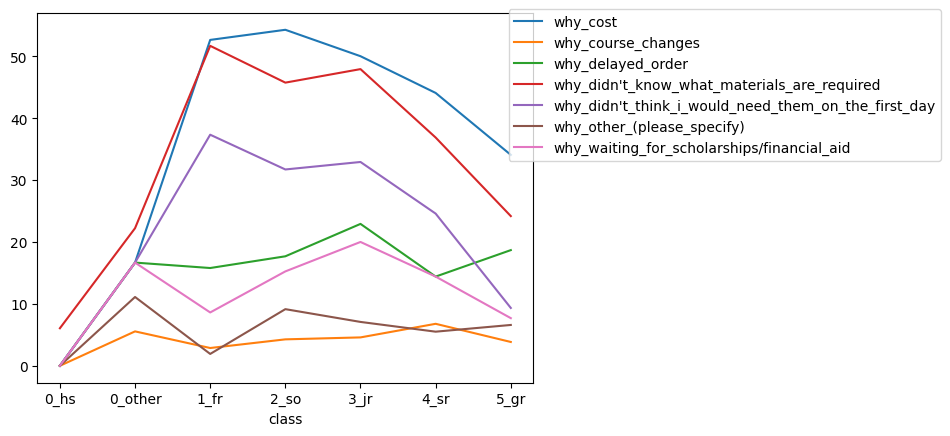

In [21]:
# Why did you not have materials on day 1
A = students.groupby('class')[students.filter(like='why').columns].mean()*100
disp(A.T.round().astype(int))
A.plot()
plt.legend(loc=(0.95,0.6))
# observe: "didn't know what materials are required", "cost", & "didn't think I would need them on the first day"
# are 3 highest ... 2 of these 3 are communication issues
# "didn't know what materials are required" drops significantly as students advance


class,0_hs,0_other,1_fr,2_so,3_jr,4_sr,5_gr
sources_campus_bookstore,0,28,60,58,38,27,20
sources_different_edition,0,0,6,4,5,10,4
sources_from_instructor,3,6,8,15,14,15,11
sources_online,18,67,82,84,88,83,80
sources_other,0,22,5,8,9,12,5
sources_sharing_/_borrowing,0,11,12,16,16,7,8


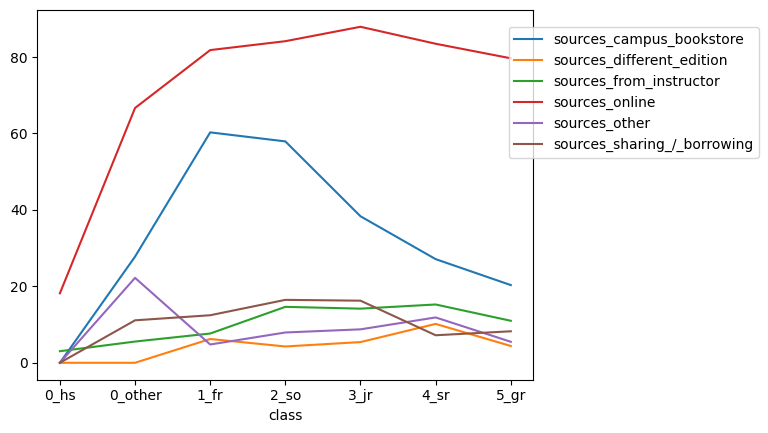

In [22]:
# Where do you get your materials
A = students.groupby('class')[students.filter(like='source').columns].mean()*100
disp(A.T.round().astype(int))
A.plot()
plt.legend(loc=(0.95,0.6))
# observe: campus bookstore drops significantly as students advance

In [23]:
# How much do you use your materials (0=never, 1=occasionally, 2=often)
U = pd.to_numeric(courses.set_index('subj')['use'].str[0]).convert_dtypes().groupby('subj').describe().dropna()
disp(U.round(2))
# observe: lowest mean is READ at 1.14, which is still above 1=occasionally
# seems to suggest that course materials are indeed getting used regularly

,count,mean,std,min,25%,50%,75%,max
subj,,,,,,,,
acct,77.0,1.91,0.29,1.0,2.0,2.0,2.0,2.0
acom,11.0,1.73,0.47,1.0,1.5,2.0,2.0,2.0
agec,9.0,1.67,0.5,1.0,1.0,2.0,2.0,2.0
agri,15.0,1.47,0.83,0.0,1.0,2.0,2.0,2.0
agsd,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
ansc,41.0,1.49,0.51,1.0,1.0,1.0,2.0,2.0
arts,26.0,1.46,0.71,0.0,1.0,2.0,2.0,2.0
bcis,76.0,1.68,0.55,0.0,1.0,2.0,2.0,2.0
biol,150.0,1.71,0.47,0.0,1.0,2.0,2.0,2.0


When run, the code below produces rich interactive graphics that do NOT appear in the static copy on github. Click "open in colab" then "Runtime->Run All".

In [24]:
analyze(data=students, vars=['class','campus','first'])

,class,campus,first,ct,pct
0,0_hs,dist,1_some_first,2,33
1,0_hs,dist,3_all_first,4,66
2,0_other,dist,2_most_first,2,100
3,0_other,ftw,1_some_first,1,50
4,0_other,ftw,3_all_first,1,50
5,0_other,steph,0_none_first,3,33
6,0_other,steph,1_some_first,2,22
7,0_other,steph,2_most_first,2,22
8,0_other,steph,3_all_first,2,22
9,0_other,waco,1_some_first,1,100


In [25]:
analyze(data=students, vars=['class','campus','spend_per_crse','pct_crse_pay'])

In [26]:
analyze(data=courses, vars=['subj','spend_per_crse','pct_crse_pay'])

In [27]:
analyze(data=courses, vars=['subj','class','spend_per_crse','pct_crse_pay'])